#CUPED

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
group_option = ['A','B']
user_id_list = []
group_list = []
covariate_list = []
metric_list = []

In [3]:
for _ in range(1000):
  user_id_list.append(_)
  group_list.append(random.choice(group_option))
  covariate_list.append(random.normalvariate(3500, 1000))
  metric_list.append(random.normalvariate(3500,1000)*random.randint(0,1))

In [4]:
data = {'user_id':user_id_list,
        'group':group_list,
        'covariate':covariate_list,
        'metric':metric_list}

In [5]:
df = pd.DataFrame(data=data)

In [6]:
df.head()

,user_id,group,covariate,metric
0,0,A,3926.865731,0.000000
1,1,B,3627.206122,2464.596115
2,2,A,3245.593265,2759.915059
3,3,A,5307.228223,0.000000
4,4,B,3381.117680,5813.209695


In [7]:
df.describe()

,user_id,covariate,metric
count,1000.000000,1000.000000,1000.000000
mean,499.500000,3412.510138,1783.382728
std,288.819436,994.668983,1904.836469
min,0.000000,351.600448,0.000000
25%,249.750000,2757.554397,0.000000
50%,499.500000,3375.288462,1438.006318
75%,749.250000,4103.348222,3524.154888
max,999.000000,6170.144511,6822.466037


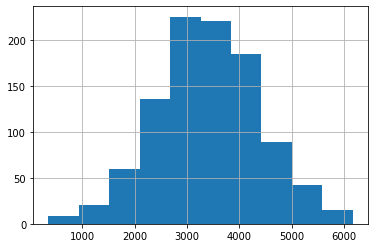

In [8]:
df['covariate'].hist()

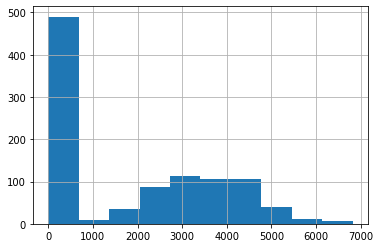

In [9]:
df['metric'].hist()

In [10]:
def covariance(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

In [11]:
def variance(data, ddof=0):
    """
    :param ddof 0 - дисперсия генеральной совокупности, 1 - выборки
    """
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

In [12]:
df['theta'] = covariance(df['metric'],df['covariate'])/variance(df['covariate'])

In [13]:
df['cuped'] = df['metric'] - (df['covariate'] - np.mean(df['covariate']))*df['theta']

In [14]:
df.head(10)

,user_id,group,covariate,metric,theta,cuped
0,0,A,3926.865731,0.000000,-0.125642,64.624565
1,1,B,3627.206122,2464.596115,-0.125642,2491.570906
2,2,A,3245.593265,2759.915059,-0.125642,2738.943322
3,3,A,5307.228223,0.000000,-0.125642,238.055801
4,4,B,3381.117680,5813.209695,-0.125642,5809.265490
5,5,A,3801.391893,0.000000,-0.125642,48.859806
6,6,B,4627.349214,3098.287798,-0.125642,3250.922373
7,7,B,3375.503919,0.000000,-0.125642,-4.649528
8,8,B,3830.173989,4737.619091,-0.125642,4790.095131
9,9,B,3083.495944,0.000000,-0.125642,-41.337937


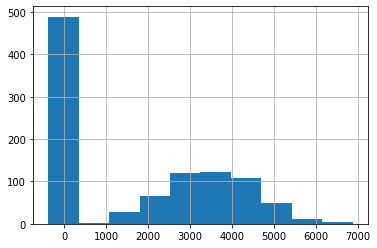

In [15]:
df['cuped'].hist()